# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Bassily, Hany

### Part (b): Course Number

CS E-109A

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

<font color= 'blue'>
### Solution:
</font>
<br>
For this part we will proceed as follows:
 - Open the dataset and do some inspection and visualization
 - Address the point of why the PCA is a better approach for dimensional reduction than step wise variable selection
 - Perform the selecion of the minimum number of principal components
 - Interpretation of the principal components  and the principal component variables
 
<br>

#### 1. Open Data Set and visualize:

<br>

In [2]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Importing the data and display main properties:
# -----------------------------------------------

# Read raw data file
data_raw = np.loadtxt('datasets/dataset_1.txt' , delimiter = ',')

# data array shape
print '\n Data array shape    = ', data_raw.shape

# #xtract the features and reponse
features = data_raw[:,:-1]
y = data_raw[:, -1]
print ' \n Data features Shape = ' , features.shape
print ' Data Response Shape = ' , y.shape
print '\n'


 Data array shape    =  (543L, 65L)
 
 Data features Shape =  (543L, 64L)
 Data Response Shape =  (543L,)




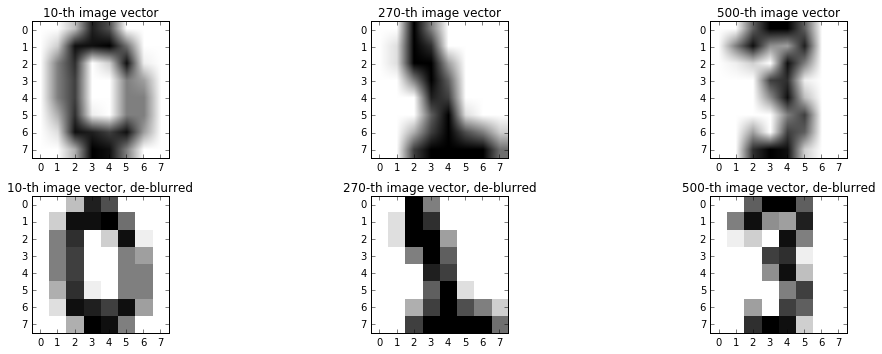

In [3]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Visualize some image examples:
# -----------------------------

fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(features[10].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('10-th image vector')
ax[0, 1].imshow(features[270].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('270-th image vector')
ax[0, 2].imshow(features[500].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('500-th image vector')

ax[1, 0].imshow(features[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('10-th image vector, de-blurred')
ax[1, 1].imshow(features[270].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('270-th image vector, de-blurred')
ax[1, 2].imshow(features[500].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('500-th image vector, de-blurred')

plt.tight_layout()
plt.show()

#### 2. Investigate step-wise variable selection vis a vis the PCA

<br>
For this purpose the following will be executed:
 - Visualize a random selection of two variables
 - Visualize a random selection of three variables
 - Build up a conclusion about the PCA versus the random variable selection

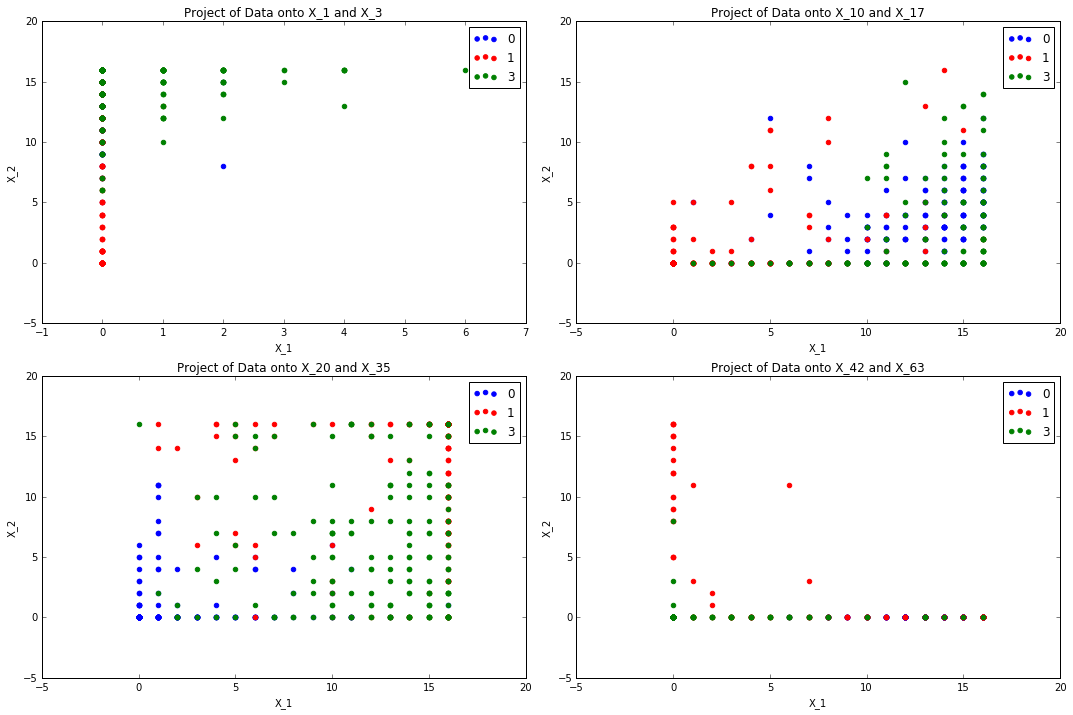

In [4]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Data projection on two random dimensions
# ----------------------------------------

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Project onto axes: 1, 3
x_2d = features[:, [1, 3]]

ax[0 , 0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0 , 0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0 , 0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0 , 0].set_xlabel('X_1')
ax[0 , 0].set_ylabel('X_2')
ax[0 , 0].set_title('Project of Data onto X_1 and X_3')
ax[0 , 0].legend()

#Project onto axes: 10, 17
x_2d = features[:, [10, 17]]

ax[0 , 1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0 , 1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0 , 1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0 , 1].set_xlabel('X_1')
ax[0 , 1].set_ylabel('X_2')
ax[0 , 1].set_title('Project of Data onto X_10 and X_17')
ax[0 , 1].legend()

#Project onto axes: 20, 35
x_2d = features[:, [20, 35]]

ax[1 , 0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1 , 0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1 , 0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[1 , 0].set_xlabel('X_1')
ax[1 , 0].set_ylabel('X_2')
ax[1 , 0].set_title('Project of Data onto X_20 and X_35')
ax[1 , 0].legend()

#Project onto axes: 42, 63
x_2d = features[:, [42, -1]]

ax[1 , 1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1 , 1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1 , 1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[1 , 1].set_xlabel('X_1')
ax[1 , 1].set_ylabel('X_2')
ax[1 , 1].set_title('Project of Data onto X_42 and X_63')
ax[1 , 1].legend()

plt.tight_layout()
plt.show()

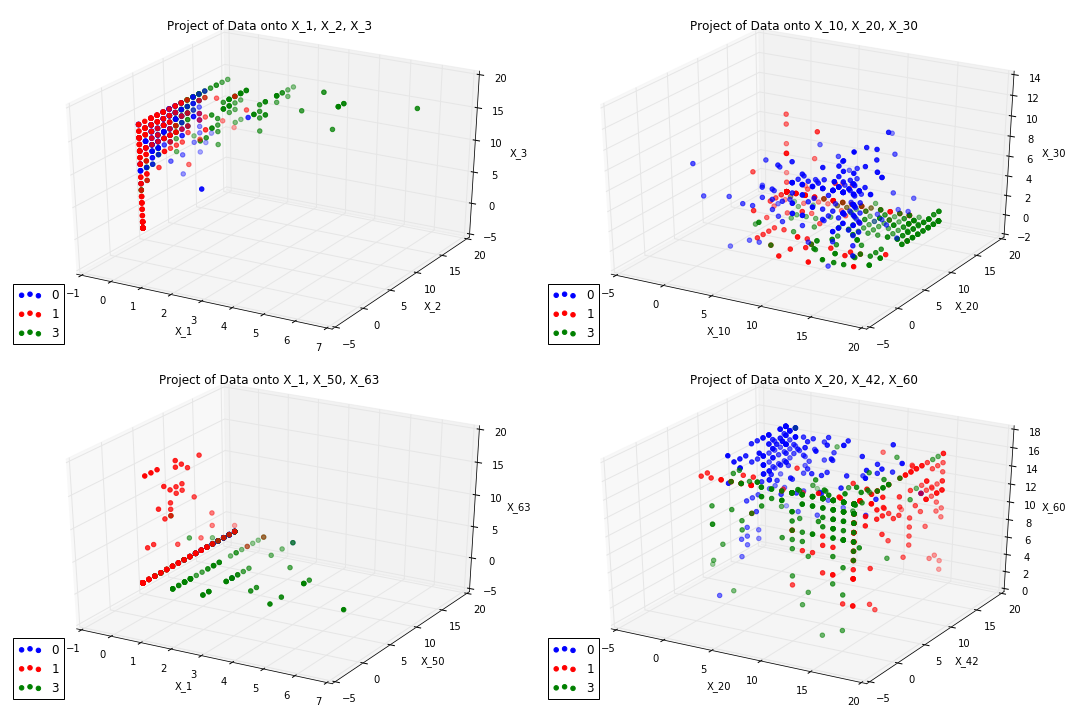

In [5]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Data projection on three random dimension
# -----------------------------------------

fig = plt.figure(figsize=(15, 10))


#Project onto axes: 1, 2, 3
x_2d = features[:, [1, 2, 3]]

ax1 = fig.add_subplot(2, 2, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: 10, 20, 30
x_2d = features[:, [10, 20, 30]]

ax2 = fig.add_subplot(2, 2, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax2.set_xlabel('X_10')
ax2.set_ylabel('X_20')
ax2.set_zlabel('X_30')
ax2.set_title('Project of Data onto X_10, X_20, X_30')
ax2.legend(loc='lower left')

#Project onto axes: 1, 50, 63
x_2d = features[:, [1, 50, 63]]

ax3 = fig.add_subplot(2, 2, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_1')
ax3.set_ylabel('X_50')
ax3.set_zlabel('X_63')
ax3.set_title('Project of Data onto X_1, X_50, X_63')
ax3.legend(loc='lower left')

#Project onto axes: 20, 42, 60
x_2d = features[:, [20, 42, 60]]

ax3 = fig.add_subplot(2, 2, 4,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_20')
ax3.set_ylabel('X_42')
ax3.set_zlabel('X_60')
ax3.set_title('Project of Data onto X_20, X_42, X_60')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

<br>

**Conclusion:**

<br>
From the above projection visualizations we can deduce the following:
 - Since the main purpose of this dimension reduction practice is to find the minimum set of dimensions that achieve the purpose of good classification, a lot of iterrative work should be executed
 - In our case, the total number of iterrations is $2^64$. For higher dimensions, the matter could be more complicated
 - Even if the best combination of dimensions is found, the variability in the projection could be not sufficient enough to execute the classification with minimal error
 - On the other hand the PCA achieve two purposes:
  * Project the data on the axes of biggest variability, improving by this mean the chances of having class seperation
  * Rank the projection dimensions according to the data variability which facilitate the variable selection

<br>

#### 3. Perform the PCA

<br>
For this step the following will be performed:
 - Execute the PCA decomposition and select the first three components
 - Visualize the first two and the three components
 - Build a decision based on the visualiztion
 
<br>

In [6]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Perform the PCA ecomposition for the first 2 and 3 components:
# --------------------------------------------------------------

#Apply PCA to data and get the top 3 axes of maximum variation
pca3 = PCA(n_components=3)
pca3.fit(features)

#Apply PCA to data and get the top 2 axes of maximum variation
pca2 = PCA(n_components=2)
pca2.fit(features)

# 3 Components 
components3 = pca3.components_

# 2 Components
components2 = pca2.components_

# Project to the data onto the three axes to obtain the reduced data
x_reduced_3 = pca3.transform(features)

# Project to the data onto the two axes to obtain the reduced data
x_reduced_2 = pca2.transform(features)

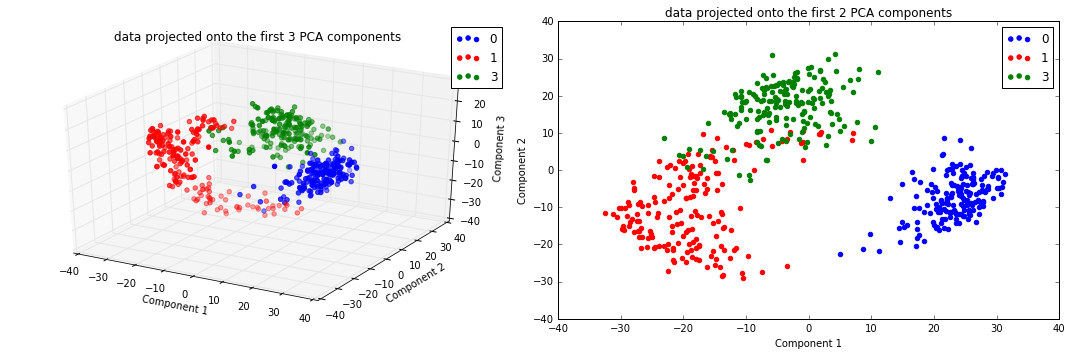

In [7]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Visualize the reduced data:
# ---------------------------

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced_3[y==0, 0], x_reduced_3[y==0, 1], x_reduced_3[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced_3[y==1, 0], x_reduced_3[y==1, 1], x_reduced_3[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced_3[y==3, 0], x_reduced_3[y==3, 1], x_reduced_3[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced_2[y==0, 0], x_reduced_2[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced_2[y==1, 0], x_reduced_2[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced_2[y==3, 0], x_reduced_2[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

#### Conclusion:

<br>
Based on the visualization of the transformed data based on two and three principal components, the following can be deduced:
 - Both transformation achieve a good class separation which can contribute to a good classifier performance
 - Since both transformations achieve the same purpose, it is recommended to consider the transformation with the smallest dimension for practicality

#### 4. Interpretation of the principal components and the transformed variables:

<br>

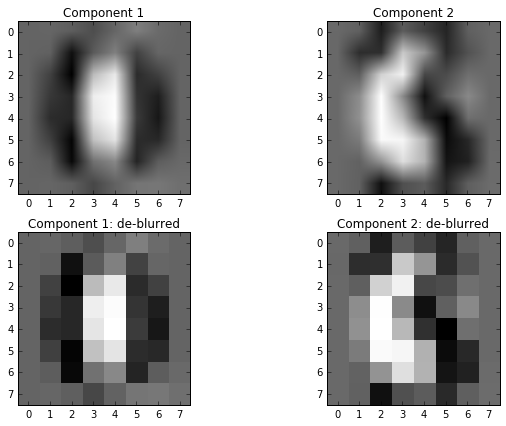

In [8]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Visualize the principle components:
# -----------------------------------

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(components2[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(components2[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(components2[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(components2[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

**Conclusion:**

<br>
- The principle components represents derived dimensions for the data for which the variability in the data is ranked from the maximum to the minimu.
- In our case, it happens that the principle dimensions represent the individual classes due to the features variability between each class (digit in our case)

** Principal Component Variables:**

Based on the scatter plot presented above the following can be stated about the principal comp0nent variables:
 - They represent the projection of the data on each of the principal components
 - In other words, they represent the similarity ratio between the data point and the principal component
 - They are obtained by the inner product of the data points features and each principle component
 - In our case, since the principle components are close enough to the designated classes, they can be considered as a scalar measure of resemblance between the data point and each principal component
 - The last observation is a major contributor to the fact that the first transformations has a high degree of class separatability
 
<br>

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

<font color= 'blue'>
### Solution:
</font>
<br>

The pursued approach will be to build a binary classifier between each two groups and apply a voting process for each data point. The class attributed to the data point will be the one acquiring the highest vote among the three classifiers

<br>

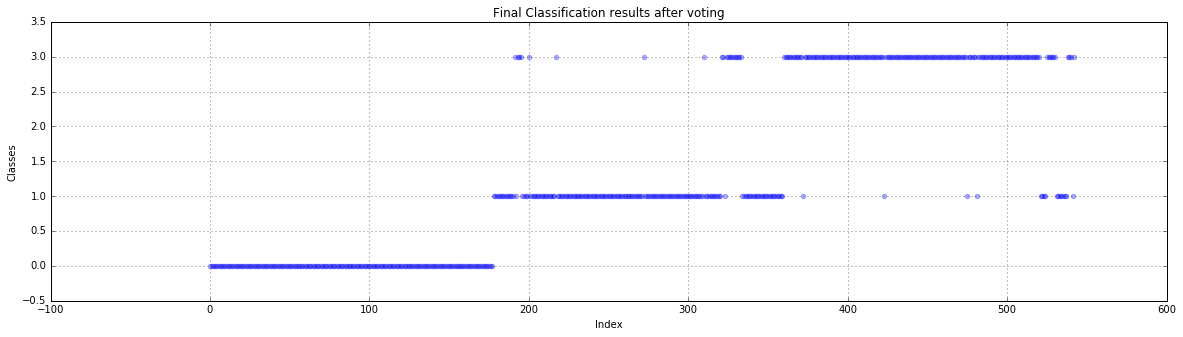

In [9]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Build a classifier to distinguish between 0 and 1
# -------------------------------------------------

#Remove all instances of class 3
x_binary = x_reduced_2[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg(C = 1000000000)
logistic_01.fit(x_binary, y_binary)

# Build a classifier to distinguish between 1 and 3
# -------------------------------------------------

#Remove all instances of class 0
x_binary = x_reduced_2[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg(C = 1000000000)
logistic_13.fit(x_binary, y_binary)

# Build a classifier to distinguish between 0 and 3
# -------------------------------------------------

#Remove all instances of class 1
x_binary = x_reduced_2[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg(C = 1000000000)
logistic_03.fit(x_binary, y_binary)

# Classification voting:
# ----------------------

# Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced_2)
y_pred_13 = logistic_13.predict(x_reduced_2)
y_pred_03 = logistic_03.predict(x_reduced_2)

# Vote majority
n = x_reduced_2.shape[0]
y_votes = np.zeros((n, 3))

# Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

# Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

# Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

# Votes evaluation
y_pred = y_votes.argmax(axis = 1)

# Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

# Visualize the classification
# ----------------------------

fig = plt.figure(figsize = (20,5))
ind = np.array(range(y_pred.shape[0]))

ax = fig.add_subplot(111)
ax.scatter(ind, y_pred, color = 'blue' ,alpha=0.3)
ax.set_ylabel('Classes')
ax.set_xlabel('Index')
ax.set_title('Final Classification results after voting')
ax.grid(True)

plt.show()

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

<font color= 'blue'>
### Solution:
</font>
<br>
#### 1. Accurcy and Decision Boundaries Visualiztion

<br>

In [10]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Accuracy Calculation
# --------------------

accuracy = np.mean(y == y_pred)

print '\n The accuracy of the model is : ', accuracy
print '\n'


 The accuracy of the model is :  0.933701657459




In [11]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# A function to fit a binary LogReg model and visualize the decision boundary
# ---------------------------------------------------------------------------


# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced_2[:, 0])
    x_1 = np.max(x_reduced_2[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


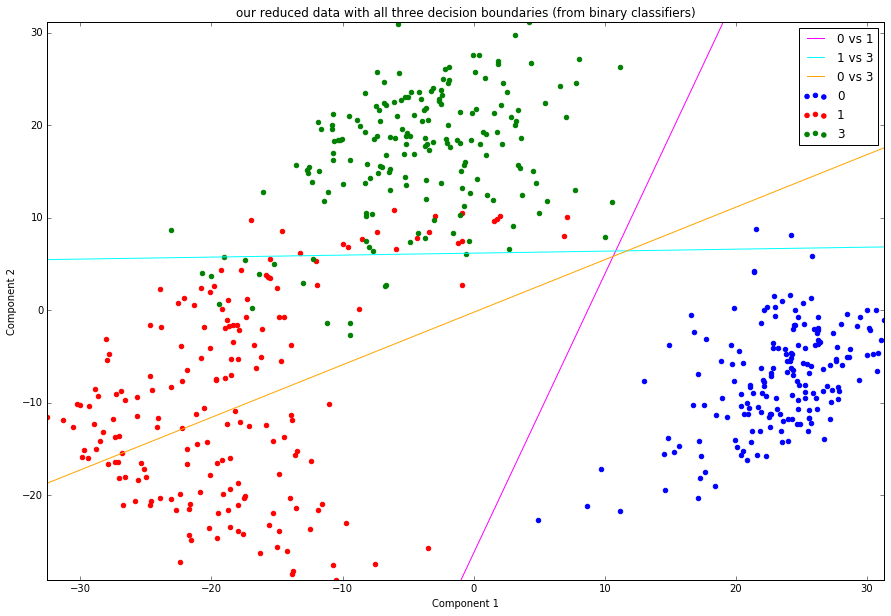

In [12]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Visualize the decision boundaries for the three models:
# -------------------------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Scatter plot of our data
ax.scatter(x_reduced_2[y==0, 0], x_reduced_2[y==0, 1], color='b', label='0')
ax.scatter(x_reduced_2[y==1, 0], x_reduced_2[y==1, 1], color='r', label='1')
ax.scatter(x_reduced_2[y==3, 0], x_reduced_2[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced_2[:,0]), np.max(x_reduced_2[:,0])])
ax.set_ylim([np.min(x_reduced_2[:,1]), np.max(x_reduced_2[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

** Remarks on the visualization:**

The followng can be deduced from the accuracy number and the visualization of the decision boundaries:
 - The accuracy number gives a lumpsum evaluation about the the performace of the three models without any details of the potential performance aspects of each of the three models
 - The decision poundaries details the performance of each model in classifying each class and how the voting decision can evolved.
 - More specificaly, the following can be concluded from the decision boundaries visualiztion:
  * Most of the rror emerge from the classification between 1 and 3 since the boundary between the two classes is not well defined. In fact, the model 1_3 decision boundary has members of both classes on both sides
  * The best classification is performed by the model 0_1 which is clearly due to the fact that the "0" class is well separable
  * The same also applies for the model 0_3
  * The voting process can be easily deduced from the figure as the "0" is comprised between the lines 0_3 and 0_1, similarily, the "3" class is comprised between the boundaries of 1_3 and 0_3 and the same apply for the "1" class with the boundaries of 1_3 and 0_1

#### 2. Drawback of this classification method:

<br>
The above classification method has the following disadvantages:
 - For each class, it requires a $Cr_2^n$ number of models to reach a classification which is a computational burden if the number of classes is big
 - Also in the case of high number of classes, the seperation between the different classes with the big number of models could fail the classification due to the intersections between the different decision boundaries
 - If the decision boundary is not linear, a simple voting could be no adequate in this case and some other decision forms could be required

#### 3. Multi-class modeling:

<br>

A better approach to adapt the binary classifier to the multi-class is to use a **multinomial logistic regression** like the **reference group** or **one versus the other**

#### One versus the Others:

 - In this approach, a binary classification is performed for each class against the rest of the other classes. 
 - For k class a k number of model is needed
 - To perform a classification, esch data point is tested by all the individual model
 - The data point is assigned the class of the highest probability
 
 **Advantages of the OvR:**
 
 
 - The number of models is reduced. Only k number of models needed for k class
 - Since the classification is performed class by class, it is easy to translate the resulting probability to a classification with no need to merge with other model outecomes
 - The number of the classes or the shape of the decision boundary will not affect the accuracy of the classification

In [13]:
# Evaluate the OVR model for this example:
# ----------------------------------------

#Fit logistic regression model for 0 vs 3
logistic_all = LogReg(C = 1000000000)
model = logistic_all.fit(x_reduced_2, y)

# Evalaute prediction
y_pred = model.predict(x_reduced_2)

# Calculate accuracy
accuracy_all = np.mean(y == y_pred)

print '\n The accuracy of the OvR model is    : ', accuracy_all
print '\n The accuracy of the simple model is : ', accuracy
print '\n'
print ' The OvR is slightly better due to the fact that it is closer to the Bayes classifier performance'
print ' \n'


 The accuracy of the OvR model is    :  0.935543278085

 The accuracy of the simple model is :  0.933701657459


 The OvR is slightly better due to the fact that it is closer to the Bayes classifier performance
 



## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

In [14]:
# Data file reading and preparation:
# ----------------------------------

# Open in pandas dataframe
raw = pd.read_csv('datasets\dataset_2.txt')

# print a sample to check if file is properly openrd
raw.head(2).style

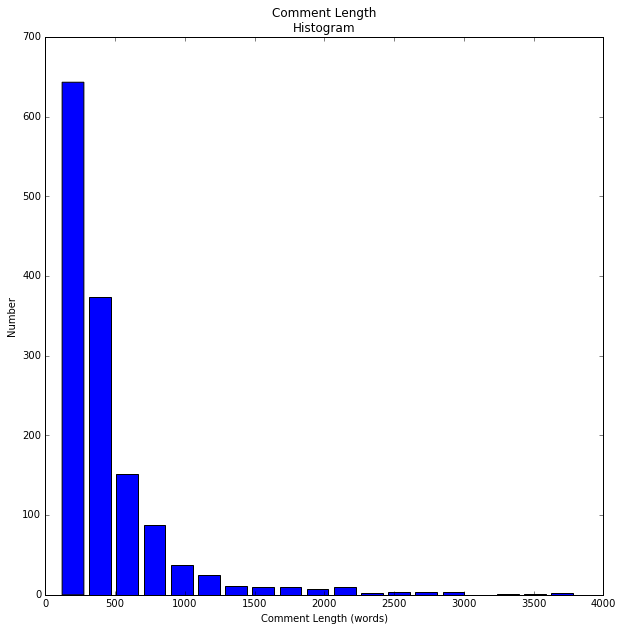

In [15]:
# Summary Exploration:
# -------------------

# Counting the number of unique words
total_words = set()
raw['text'].str.lower().str.split().apply(total_words.update)

## Counting the total number of words

# counter initiation
com_len = np.zeros((raw.shape[0], 1))

# counting loop
for i in range(com_len.shape[0]):
    cell_words = set()
    count_word = 0
    text_cell= raw.iloc[i,1]
    cell_words = text_cell.lower().split()
    com_len[i] = len(cell_words)

# sum of positive comments   
sum_positive = np.sum(raw['class'].values != 'Neg')

# sum of negative comments
sum_negative = np.sum(raw['class'].values == 'Neg')

# maximum length of a comment
max_comment  = np.max(com_len)

# minimum length of a comment
min_comment  = np.min(com_len)

# average length of a comment
avg_comment  = int(np.mean(com_len))
    
## Histogram of the word count  

# number of bins
bins = 20

# histogram initiation
bin_word = np.linspace(min(com_len), max(com_len), num = bins)
plt.figure(figsize=(10,10))
plt.hist(com_len, bin_word , histtype = 'bar', rwidth = 0.8)

# plot annotation
plt.xlabel('Comment Length (words)')
plt.ylabel('Number')
plt.title('Comment Length\nHistogram')


plt.show()

In [16]:
# Feature Extraction and predictor build up:
# ------------------------------------------

# stop words list
word_list = {'english'}

# feature extraction array
vectorizer = CountVectorizer(stop_words= word_list , min_df = 10, max_df = 900)
corpus = raw['text'].values
x = vectorizer.fit_transform(corpus)

# construct variables and response
x = x.toarray()
y = raw['class'].values

# features interpratation
features_text = vectorizer.get_feature_names()

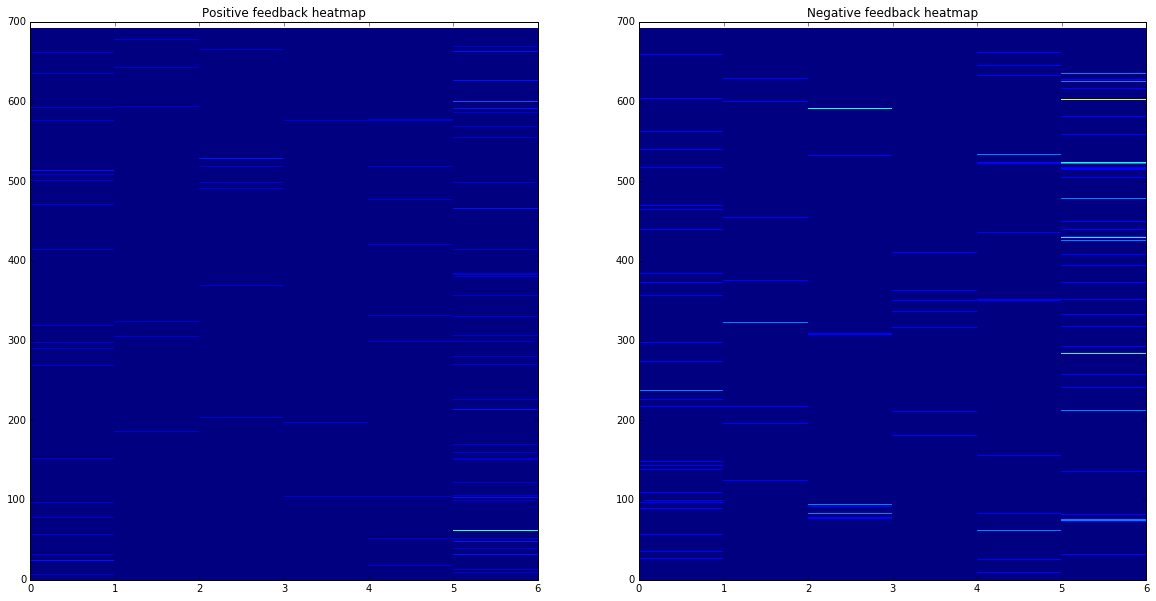

In [17]:
# Features preprocessing:
# -----------------------

# Features split into the two class data
positive = x[raw['class'].values != 'Neg' ]
negative = x[raw['class'].values == 'Neg']

## features visualization

# number of features selected for visualization
n = 5

# feature selection boundaries
start = 581
stop  = start + n + 1

# build a heatmap figure
fig = plt.figure (figsize = (20,10))

# for positive reviews
ax1 = fig.add_subplot(1,2,1)
ax1.pcolor(positive[: , start: stop])
ax1.set_title('Positive feedback heatmap')

# for negative reviews
ax2 = fig.add_subplot(1,2,2)
ax2.pcolor(negative[: , start:stop ])
ax2.set_title('Negative feedback heatmap')

plt.show()

In [18]:
# Prepare the data into training and test:
# ---------------------------------------

# ratio of the split
ratio = 0.5

# construct a response vector:
y_pos = np.ones((positive.shape[0],))
y_neg = np.zeros((negative.shape[0],))

# indices permutation
perm_pos  = np.random.permutation(positive.shape[0])
perm_neg  = np.random.permutation(negative.shape[0])

# training and test boundaries
stop_pos  = int(ratio * len(perm_pos)) + 1
stop_neg  = int(ratio * len(perm_neg)) + 1

# train and test variables for positive
train_pos = positive[:stop_pos]
test_pos  = positive[stop_pos:]

# train and test response for positive
y_train_pos = y_pos[:stop_pos]
y_test_pos  = y_pos[stop_pos:]

# train and test variables for negative
train_neg = negative[:stop_neg]
test_neg  = negative[stop_neg:]

# train and test response for negative
y_train_neg = y_neg[:stop_neg]
y_test_neg  = y_neg[stop_neg:]

# train and test variables
x_train = np.concatenate((train_pos, train_neg))
x_test  = np.concatenate((test_pos, test_neg))

# train and test response
y_train = np.concatenate((y_train_pos, y_train_neg))
y_test  = np.concatenate((y_test_pos, y_test_neg))

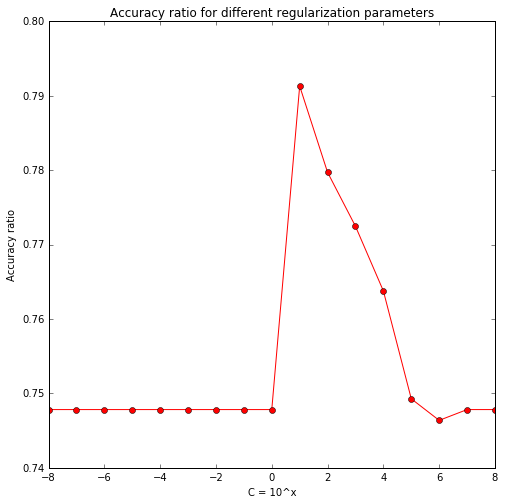

In [19]:
# Model regularization:
# ---------------------

# Select a range of the regularization parameter
c_range = np.array(range(-8,9,1))

# initiate an array for the accuracies ratios
accurracies = np.zeros(c_range.shape)

# Calculate the accurracies for different regularization values
for c , i in enumerate(c_range):
    
    # fit the model
    model = LogReg(C = 10**c)
    model.fit(x_train, y_train)
    
    # calculate the accuracy
    accurracies[i] = model.score(x_test, y_test)

# Visualize the results

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111)
ax.plot(c_range, accurracies, 'ro-')
ax.set_title('Accuracy ratio for different regularization parameters')
ax.set_xlabel('C = 10^x')
ax.set_ylabel('Accuracy ratio')

plt.show()

In [20]:
# Selection of best model and regularization
# ------------------------------------------

# Best Regularization factor "C"
best_c_exp = c_range[np.argmax(accurracies)]
best_c = 10 ** best_c_exp

# Best model accuracy
best_accurracy = np.max(accurracies)

# print results
print '\nBest value for "C"   : ', best_c
print '\nBest model accuracy  : ', best_accurracy


Best value for "C"   :  10

Best model accuracy  :  0.791304347826


In [21]:
# Fitting the best model:
# -----------------------

# Total response variable
y = np.zeros((x.shape[0] ,))
y[raw.iloc[:,0].values != 'Neg' ] = 1

# Fit the best model
model_best = LogReg(C=10)
model_best.fit(x_train, y_train)

# Calculate the overall accurracy
accurracy_all =model_best.score(x,y)

# printing the best overall accurracy
print accurracy_all

# Features count for positive and negative reviews
feat_sum_pos = np.sum(x[y == 1] , axis = 0)
feat_sum_neg  = np.sum(x[y != 1] , axis = 0)

# Construct a summary data frame including the coefficients and the feature counts
features_raw = pd.DataFrame({'count_neg' : feat_sum_neg , 'count_pos' : feat_sum_pos ,
                             'coef' :model_best.coef_[0,:] , 'features' : features_text })

# display few rows for sanity check
features_raw.head()

0.89001447178


,coef,count_neg,count_pos,features
0,-0.027619,78,40,00
1,0.165906,614,454,000
2,0.207900,9,11,02
3,0.005425,20,4,03
4,0.043808,11,33,0l


In [22]:
# Sort the Positive features
# --------------------------

# Number of most influential features
N = 20

# Data frame ordered by the order of features influence in positive review
feat_pos = features_raw.sort_values(by='coef', ascending=0).iloc[:N]

# print out of the ordered features
feat_pos

,coef,count_neg,count_pos,features
2269,0.934111,128,156,radio
3010,0.921119,64,154,trips
1334,0.900320,71,97,happy
1388,0.899141,21,76,highly
2752,0.884906,401,413,still
2241,0.880166,160,174,purchased
2322,0.845303,69,106,recently
2036,0.758530,136,162,owned
1078,0.705070,80,147,extra
2035,0.695994,177,183,own


In [23]:
# Sort the Negative features
# --------------------------

# Data frame ordered by the order of features influence in negative review
feat_neg = features_raw.sort_values(by='coef', ascending=1).iloc[:N]

# printout of the ordered features
feat_neg

,coef,count_neg,count_pos,features
745,-1.048146,211,91,cost
867,-1.006822,448,288,did
2369,-0.926589,172,71,repairs
1760,-0.879833,328,260,many
1522,-0.842150,403,300,into
1912,-0.787828,354,238,never
2907,-0.783362,459,237,then
3243,-0.773752,61,8,worst
2993,-0.759536,589,234,transmission
1850,-0.725238,198,128,money


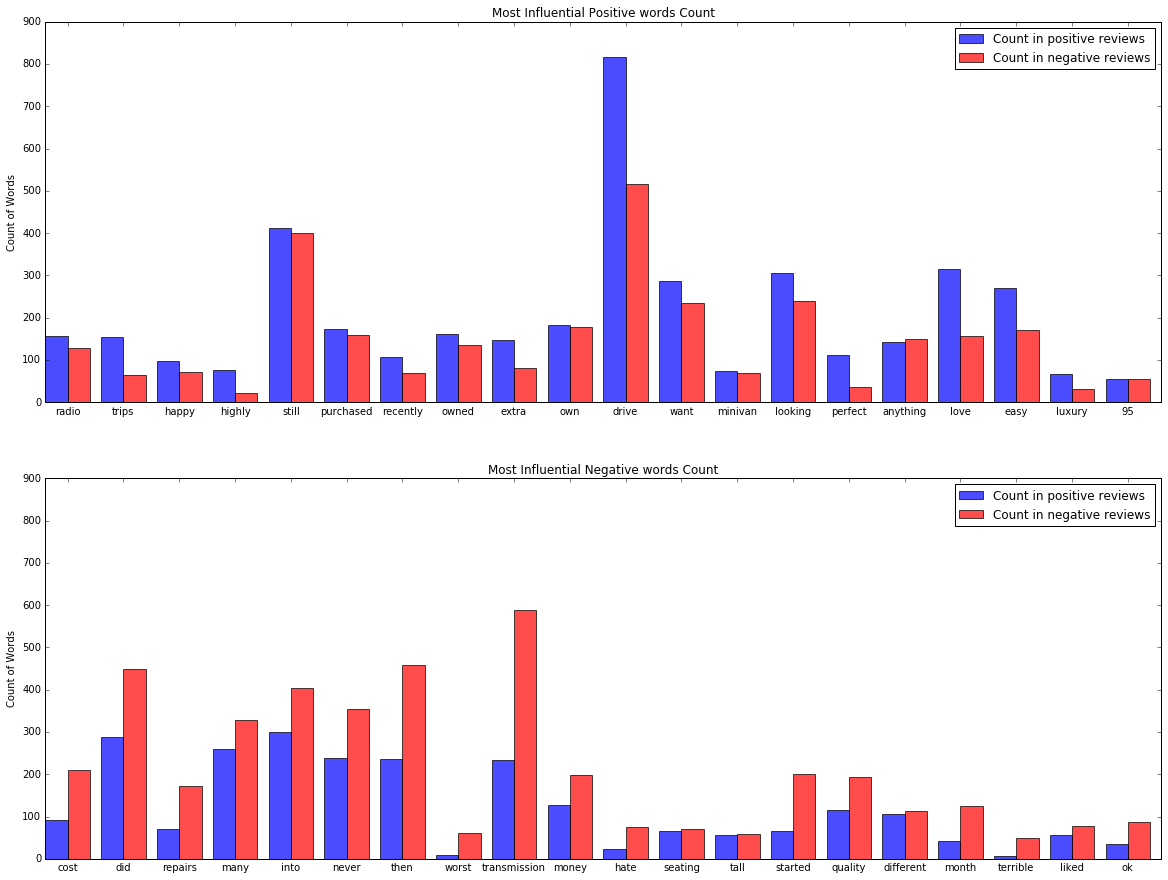

In [24]:
# Visualization
# -------------

# initialize the figure
fig = plt.figure(figsize = (20, 15))

# specify the span and width of the bars
ind = np.arange(N) 
width = 0.4

# initiate the first plot
ax1 = fig.add_subplot(211)

# Draw the bar chart
rect1 = ax1.bar(ind, feat_pos['count_pos'].values , width, color = 'b' , alpha = 0.7)
rect2 = ax1.bar(ind + width ,  feat_pos['count_neg'].values , width , color ='r', alpha = 0.7)

# Annotate the graph
ax1.set_ylim([0,900])
ax1.set_ylabel('Count of Words')
ax1.set_title('Most Influential Positive words Count')
ax1.set_xticks(ind + width)
ax1.set_xticklabels((feat_pos['features'].values))
ax1.legend((rect1[0], rect2[0]), ('Count in positive reviews', 'Count in negative reviews'))

# Initiate the second graph
ax2 = fig.add_subplot(212)

# Draw the bar chart
rect1 = ax2.bar(ind, feat_neg['count_pos'].values , width, color = 'b' , alpha = 0.7)
rect2 = ax2.bar(ind + width ,  feat_neg['count_neg'].values , width , color ='r', alpha = 0.7)

# Annotate the graph
ax2.set_ylim([0,900])
ax2.set_ylabel('Count of Words')
ax2.set_title('Most Influential Negative words Count')
ax2.set_xticks(ind + width)
ax2.set_xticklabels((feat_neg['features'].values))
ax2.legend((rect1[0], rect2[0]), ('Count in positive reviews', 'Count in negative reviews'))


plt.show()

# Report

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.